# Análise descritiva dos datasets em estudo
#### Gabriel Martins Trettel, PGC II, 22/02/21
---
 - Twitter
 - Comentarios polêmicos
 - Emails

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math, csv, operator, re
from matplotlib import rcParams

sns.set(rc={'figure.figsize':(10,6), 'legend.fontsize': 22.0, 'font.size':22.0, 'legend.title_fontsize': 22.0,
})

TABLE_PATH = "../../../datasets/tweets/tweets.csv"
# rcParams.keys()

In [3]:
df = pd.read_csv(TABLE_PATH,
                 sep="|",
                 lineterminator='\n',
                 usecols=range(5),
                 quoting=csv.QUOTE_NONE)

In [3]:
print("Tamanho do dataset: ", len(df.index))

Tamanho do dataset:  1475194


In [4]:
df#.sample(15)

,user_id,tweet_id,tweet_lang,is_RT,tweet_content
0,1001568757,1000056019656101888,en,False,@braverbeast I don't think you're an annoying ...
1,1001568757,1000056374435434497,en,False,"@cgpgrey And with that, the ""grey vs gray"" dis..."
2,1001568757,1000228789903863808,en,False,Pls turn off the lights I wanna go to bed http...
3,1001568757,1000482544238956545,en,False,@keltbh @ipkipi stylenon
4,1001568757,1000563792701468673,en,True,RT @GreyAnnis: Made it in time for #mermay! #m...
...,...,...,...,...,...
1475189,986138328,1084109309556838401,en,True,RT @tuanpics: WHEN WILL I EVER GET THIS LUCKY ...
1475190,986138328,1084109398522253312,en,True,RT @tuanpics: excuse me while i cry over this ...
1475191,986138328,1084265393462534144,en,False,UGH I'M DISGUSTED https://t.co/0D4nlRO3Fs
1475192,986138328,1084265894849593344,en,True,RT @markjinssi: they look so damn good.. their...


In [4]:
len(df.user_id.unique())

715

### Em quais linguagens estão os tweets?

In [5]:
langs = df.tweet_lang.unique()
print(f"Um total de {len(langs)} linguagens diferentes, sendo elas:" + "\n" + f"{', '.join(langs.tolist())}")

Um total de 53 linguagens diferentes, sendo elas:
en, und, it, no, ht, fr, cy, ja, de, nl, lt, pt, in, cs, es, is, pl, hu, et, fi, sv, tl, sl, eu, lv, zh, tr, da, hi, ro, ca, vi, ar, gu, kn, ko, fa, ru, iw, ur, th, mr, ne, dv, el, pa, ta, te, ml, am, uk, or, bn


<AxesSubplot:>

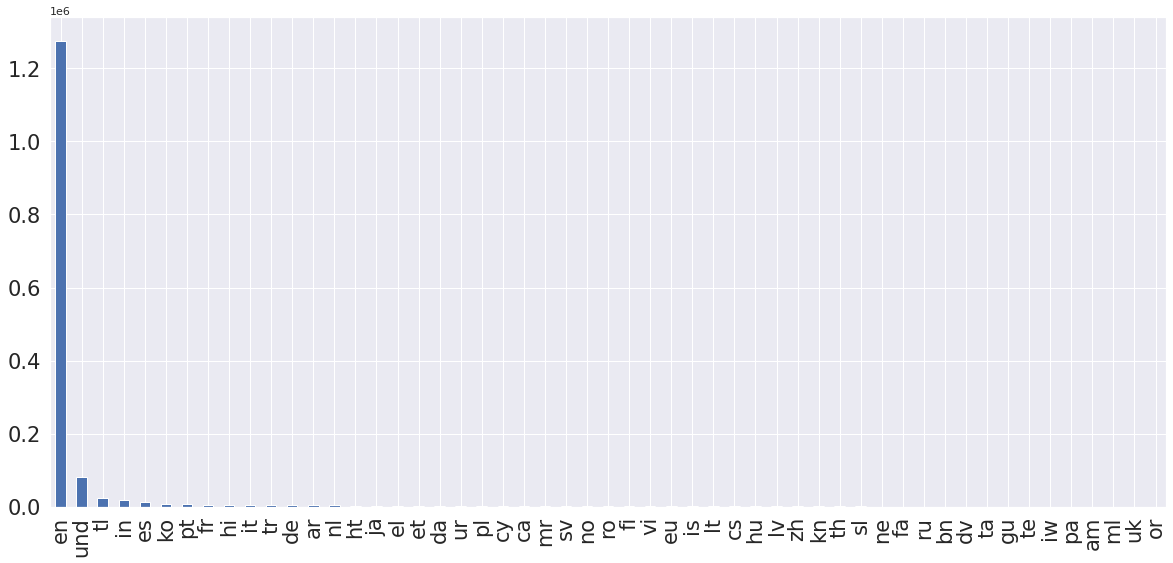

In [6]:
df.tweet_lang.value_counts().plot(kind='bar', figsize=(20,9), fontsize=21)

### Do total de dados, quantos estão em inglês?

In [5]:
tot = len(df.index)
en = df.tweet_lang.value_counts()['en']
print(f"Do dataset, {math.floor(en*100/tot)}% são textos em ingês. Total de {tot}")

Do dataset, 86% são textos em ingês. Total de 1475194


### Do total de dados, quantos não são RTs?

In [6]:
true = df.is_RT.value_counts()[False]
print(f"Do dataset, {math.floor(true*100/tot)}% não são textos são RTs")

Do dataset, 76% não são textos são RTs


### Do total de dados, quantos não são RTs **e** estão em inglês?

In [7]:
en_df = df.loc[df.tweet_lang == "en"]
valid_df = en_df.loc[en_df.is_RT == False]

print(f"Do dataset, {math.floor(len(valid_df.index)*100 /tot)}% \
não são RTs e estão em inglês, totalizando {len(valid_df.index)}")

Do dataset, 65% não são RTs e estão em inglês, totalizando 972024


### Quantas pessoas estão presentes no dataset?

obs: a partir de agora, considerando apenas tweets em inglês e não RTs

In [13]:
valid_df

,user_id,tweet_id,tweet_lang,is_RT,tweet_content
0,1001568757,1000056019656101888,en,False,@braverbeast I don't think you're an annoying ...
1,1001568757,1000056374435434497,en,False,"@cgpgrey And with that, the ""grey vs gray"" dis..."
2,1001568757,1000228789903863808,en,False,Pls turn off the lights I wanna go to bed http...
3,1001568757,1000482544238956545,en,False,@keltbh @ipkipi stylenon
5,1001568757,1000857670319042560,en,False,"Just a terrific mobile app you've got there, @..."
...,...,...,...,...,...
1475133,986138328,1083367471204098048,en,False,honestly one of the best kpop albums i've ever...
1475134,986138328,1083367618692636673,en,False,probably my most played album of 2018 oof
1475179,986138328,1083915932014063616,en,False,only M.I.A stans can see this tweet
1475183,986138328,1083920859914428416,en,False,but have you watched no mercy https://t.co/euw...


In [10]:
f"{len(valid_df.user_id.unique())} usuários"

'710 usuários'

<AxesSubplot:title={'center':'Quantidade de pessoas vs. tweets'}, ylabel='Frequency'>

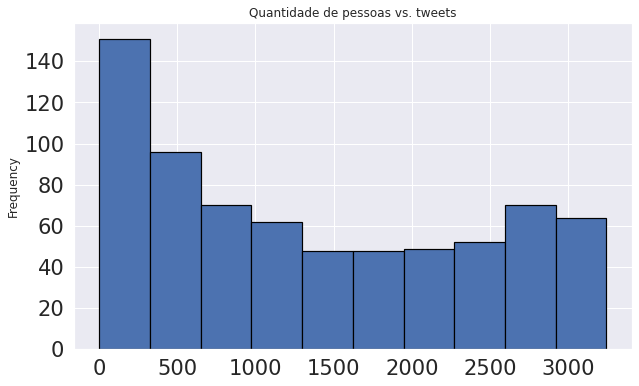

In [8]:
valid_df.user_id.value_counts().plot(kind='hist', figsize=(10,6), fontsize=21, edgecolor='black', linewidth=1.2, title="Quantidade de pessoas vs. tweets")

### Qual o tamanho dos tweets?

In [17]:
h = valid_df.tweet_content.apply(func=lambda x: len(x)).tolist()

In [20]:
file = open("violin","w")


In [32]:
file.writelines("\n".join(str(i) for i in h))

In [75]:
valid_df.tweet_content.apply(func=lambda x: len(x)).describe()

count    972024.000000
mean         85.406983
std          39.974071
min           1.000000
25%          50.000000
50%          86.000000
75%         123.000000
max         425.000000
Name: tweet_content, dtype: float64

In [76]:
valid_df.user_id.value_counts().describe()

count     710.000000
mean     1369.047887
std      1030.743992
min         1.000000
25%       389.500000
50%      1171.500000
75%      2317.000000
max      3245.000000
Name: user_id, dtype: float64

<Figure size 216x360 with 0 Axes>

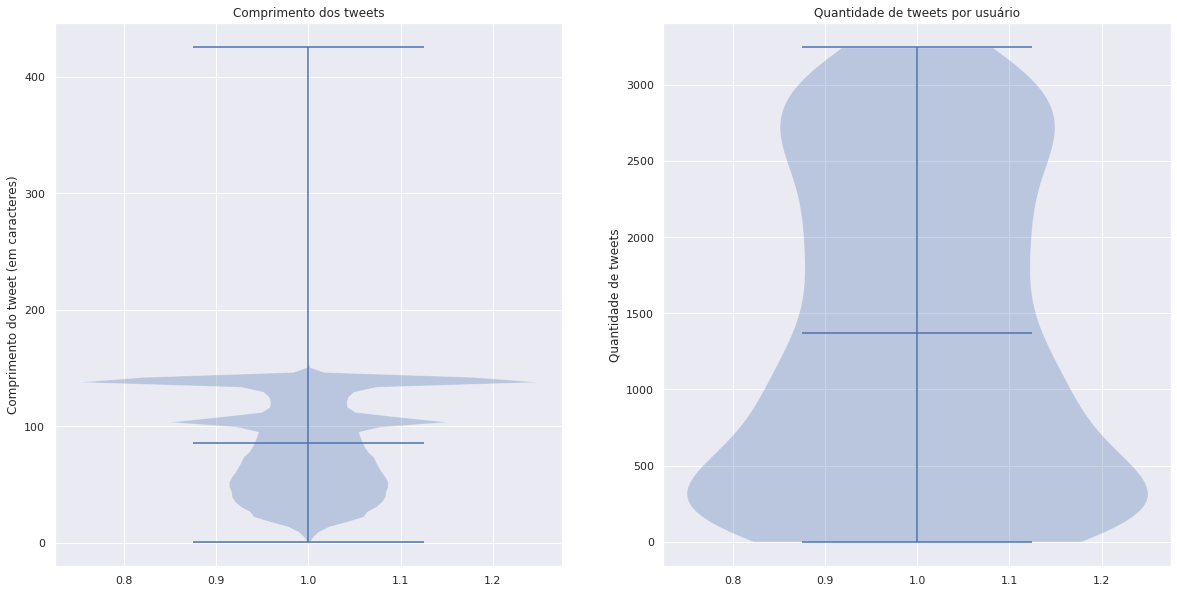

In [73]:
pyplot.figure(figsize=(3,5))
fig, ax = plt.subplots(1,2, figsize=(20,10))

ax[0].violinplot(valid_df.tweet_content.apply(func=lambda x: len(x)), vert=True, showmeans=True)
ax[1].violinplot(valid_df.user_id.value_counts(), vert=True, showmeans=True)
ax[0].set_ylabel("Comprimento do tweet (em caracteres)")
ax[0].set_title("Comprimento dos tweets")

ax[1].set_ylabel("Quantidade de tweets")
ax[1].set_title("Quantidade de tweets por usuário")
fig.savefig("../analises/figures/twitter/AD_violin.pdf")

AttributeError: 'Line2D' object has no property 'edgecolor'

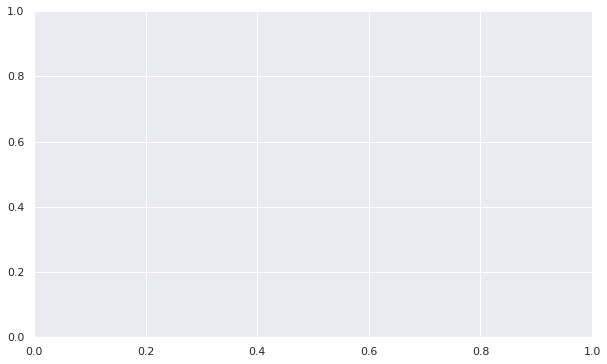

In [12]:
valid_df.tweet_content.apply(func=lambda x: len(x)).plot(kind='kde', figsize=(10,6), fontsize=21, edgecolor='black', linewidth=1.2, title="Quantidade de pessoas vs. tweets")

In [13]:
max_id = max(valid_df.tweet_content.apply(func=lambda x: len(x)).to_dict().items(), key=operator.itemgetter(1))[0]
max_tweet = valid_df.loc[max_id].tweet_content
print(f"O maior tweet tem {len(max_tweet)} caracteres, e é composto por \n\n {max_tweet}")

O maior tweet tem 425 caracteres, e é composto por 

 Harry Styles' voice &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;… https://t.co/7VtSxzudYK


[Text(0.5, 0, 'Comprimento do tweet (em caracteres)')]

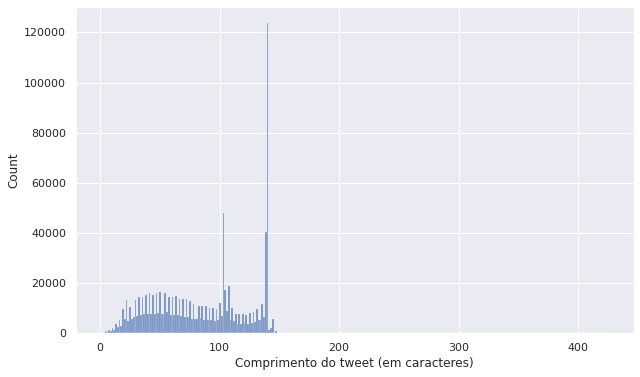

In [12]:
p = sns.histplot(valid_df.tweet_content.apply(func=lambda x: len(x)))
p.set(xlabel="Comprimento do tweet (em caracteres)")

In [13]:
valid_df.to_csv(path_or_buf="../../../datasets/twitter-filtered.csv", index=False, quoting=csv.QUOTE_ALL)

---





# Dataset polemico

In [16]:
ROOT = "../../../datasets/polemico/"
cols_to_drop = ["AccessKey", "ReviewDate", "ReviewType", "Group", "Flow", "ReviewMeta"]

gay_df = pd.read_csv(ROOT+"GayMarriage_400.csv",
                     sep="\t",
                     lineterminator='\n',
                     usecols=range(11),
                     quoting=csv.QUOTE_NONE)

gay_df = gay_df.drop(cols_to_drop, axis=1)
gay_df = gay_df.loc[gay_df.Task == "True Essay"]
gay_df.sample(10)

,UserName,Topic,Opinion,Task,ReviewText
223,A3AB3FQKT7ZQOL,Gay Marriage,support,True Essay,I fully support gay marriage. The reason that ...
1139,AEGJE1ZE7ZHZV,Gay Marriage,support,True Essay,Gay marriage should be legal in the United Sta...
235,A3BXKJG15LVQTV,Gay Marriage,support,True Essay,Gay marriage should be legal worldwide. Gen...
1231,A15S8DPIZ915JA,Gay Marriage,support,True Essay,I support gay marriage for two primary reasons...
763,APY9L92ICJN6V,Gay Marriage,oppose,True Essay,"I oppose gay marriage, but not for the same re..."
291,A3QAIABUJV1GAO,Gay Marriage,oppose,True Essay,Gay marriage is not what God intended when he ...
111,A22KKHWNAYLMAV,Gay Marriage,oppose,True Essay,I firmly oppose gay marriage because it is not...
335,AH4S22PWE826G,Gay Marriage,support,True Essay,People cannot change who they are from birth. ...
435,A1DUH3RLI00YQM,Gay Marriage,oppose,True Essay,I am opposed to gay marriage as I am a traditi...
411,A112SA06N0PR4E,Gay Marriage,oppose,True Essay,Gay marriage is a huge topic now and days. I p...


In [17]:
gun_df = pd.read_csv(ROOT+"GunControl_400.csv",
                     sep="\t",
                     lineterminator='\n',
                     usecols=range(11),
                     quoting=csv.QUOTE_NONE)

gun_df = gun_df.drop(cols_to_drop, axis=1)
gun_df = gun_df.loc[gun_df.Task == "True Essay"]

gun_df.sample(10)

,UserName,Topic,Opinion,Task,ReviewText
1047,A35DSHKI68VP6V,Gun Control,oppose,True Essay,Guns have always been a right and need to the ...
431,A1GPYFUKR0CNZ6,Gun Control,oppose,True Essay,"Let me ask you, the reader, a question. When ..."
879,A1M907BJPOLBU1,Gun Control,support,True Essay,It seems like far too often in the United Stat...
343,ALWLGNJVVAULE,Gun Control,oppose,True Essay,By taking guns out of the every day citizens o...
1163,ATL6G3OYDLVVA,Gun Control,oppose,True Essay,I do not support strict gun control. While I a...
855,A1DNPYZKVJ05O9,Gun Control,support,True Essay,Gun control is needed. It's not putting someon...
731,A5ZEM7EL0UACF,Gun Control,oppose,True Essay,"My father is a kind, proud, responsible, respe..."
935,A22RI6QC5IEGB2,Gun Control,oppose,True Essay,Gun control is a violation of our basic rights...
307,A9ECKKD9E14NL,Gun Control,oppose,True Essay,Gun control isn't the answer to the recent tra...
335,AJB0OAEIYGY87,Gun Control,oppose,True Essay,The proper place of arms in society has been a...


In [18]:
amt_df = pd.read_csv(ROOT+"ReviewAMT_500_t.csv",
                     sep="\t",
                     lineterminator='\n',
                     usecols=range(11),
                     quoting=csv.QUOTE_NONE)

amt_df = amt_df.drop(["AccessKey", "ReviewDate", "Group", "Flow", "Restaurant", "Addr", "Site"], axis=1)
amt_df = amt_df.rename(columns={'ReviewTopic': 'Topic'})

amt_df = amt_df.loc[amt_df.Task == "True Review"]
amt_df

,UserName,Topic,Task,ReviewText
3,A002160837SWJFPIAI7L7,AMT,True Review,Famous Daves is a good place to go for some go...
7,A0436270XG2E3RS5T61O,AMT,True Review,I love this place. I often visit the place. Th...
11,A109TOWKB3DY3P,AMT,True Review,I love Cristianos. The portions are huge and t...
15,A10BJJH0V7T6X2,AMT,True Review,My husband and I wanted spend some time enjoyi...
19,A10DK1M15CN8UF,AMT,True Review,Beanies offers a great dining experience in Po...
...,...,...,...,...
1983,AZJEE91M1DU72,AMT,True Review,This is supposed to be the best Indian restaur...
1987,AZOAW8JH5HJJK,AMT,True Review,This restaurant is exquisite fine dining. Firs...
1991,AZTHBV93S8U3T,AMT,True Review,I am a very big fan of the services offered at...
1995,a2k498842rv6et,AMT,True Review,I visit this restaurant often because of all t...


### Juntando todos os 3 topicos em um DataFrame

In [19]:
polemic_df = gun_df.append(gay_df, ignore_index=True).append(amt_df, ignore_index=True)
polemic_df.sample(15)

,UserName,Topic,Opinion,Task,ReviewText
885,A1MN131V2FKN7M,AMT,NaN,True Review,Garfield's is a pub style eatery with a pleasa...
768,A3RK5LIFM82CPZ,Gay Marriage,oppose,True Essay,I think it is unnecessary to legalize gay marr...
970,A26URMUR2PQZIZ,AMT,NaN,True Review,Cafe Rio may not be authentic Mexican food but...
1298,a2k498842rv6et,AMT,NaN,True Review,I visit this restaurant often because of all t...
1224,ACHHLZEER2XMC,AMT,NaN,True Review,Home truly lives up to their name. The environ...
1141,A3G3TIX6FEMN8R,AMT,NaN,True Review,This place is my most favorite restaurant ever...
979,A290OXKG2B3ZTY,AMT,NaN,True Review,Red Robin is my number one restaurant choice! ...
765,A3OF9HAEZVBQ3G,Gay Marriage,support,True Essay,To be born gay often means living life as a se...
831,A180MPAE4QCZ90,AMT,NaN,True Review,"I have always been a wings fanatic, and have s..."
1258,AMK0Y4BKU4EJE,AMT,NaN,True Review,I absolutely find myself addicted to Wingstop....


### Assumindo que o nome de usuário é o mesmo entre os tópicos, quantos topicos cada usuário participa?

In [20]:
polemic_df.groupby("UserName").Topic.count().describe()

count    1060.000000
mean        1.226415
std         0.444949
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Topic, dtype: float64

<AxesSubplot:>

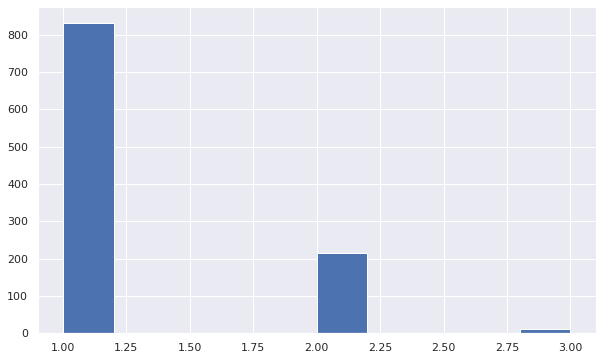

In [21]:
polemic_df.groupby("UserName").Topic.count().hist()

### Quais são os que participaram dos 3?

In [22]:
polemic_df.groupby("UserName").filter(lambda x: x.Topic.count() == 3).sort_values(by="UserName")

,UserName,Topic,Opinion,Task,ReviewText
316,A1GH8C4AAIHDQZ,Gun Control,support,True Essay,More and more this country is held hostage by ...
861,A1GH8C4AAIHDQZ,AMT,NaN,True Review,I used to go to Whataburger to get something t...
409,A1GH8C4AAIHDQZ,Gay Marriage,support,True Essay,"To me, the issue of gay marriage is an issue o..."
518,A1R8LO8YXDJSMA,Gay Marriage,support,True Essay,Love is love. It does not matter if love is be...
117,A1R8LO8YXDJSMA,Gun Control,oppose,True Essay,I am against gun control. Why should the gover...
901,A1R8LO8YXDJSMA,AMT,NaN,True Review,"TGI Friday's is a colorful, fun family restaur..."
937,A1Y94VRULB4H1I,AMT,NaN,True Review,I love Otto Pizza! I am a regular customer of ...
727,A1Y94VRULB4H1I,Gay Marriage,support,True Essay,I support gay marriage because I believe all h...
329,A1Y94VRULB4H1I,Gun Control,support,True Essay,"I 100% support gun control. I would, in fact, ..."
732,A290OXKG2B3ZTY,Gay Marriage,oppose,True Essay,"If a person is a true believer in God, then th..."


### Qual o comprimento de cada review?

In [23]:
polemic_df.ReviewText.apply(func=lambda x: len(x)).describe()

count    1300.000000
mean      773.342308
std       284.912748
min       419.000000
25%       605.000000
50%       683.500000
75%       832.250000
max      3619.000000
Name: ReviewText, dtype: float64

[Text(0.5, 0, 'comprimento de ReviewText (em caracteres)')]

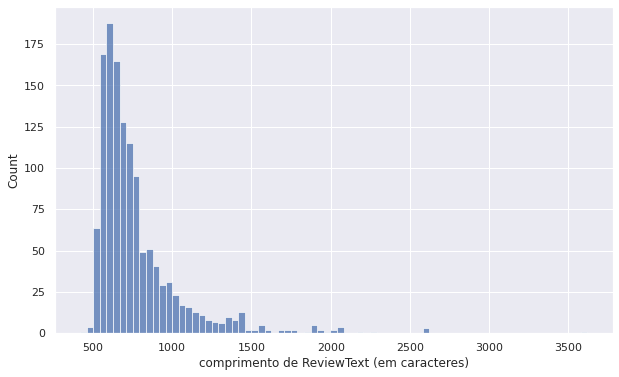

In [24]:
p = sns.histplot(polemic_df.ReviewText.apply(func=lambda x: len(x)))
p.set(xlabel="comprimento de ReviewText (em caracteres)")

### Qual o comprimento dos reviews de cada pessoa?

Ou seja, concatenar o todos os comentários num texto só e ver o comprimento. 

In [25]:
text_grouped_by_user = polemic_df.groupby("UserName").ReviewText.agg(lambda x: ''.join(x.dropna()))
text_grouped_by_user["A1GH8C4AAIHDQZ"]

"More and more this country is held hostage by more gun violence every day!  Most gun crimes, especially those with only one or two victims, seldom gain the attention of the media because they have come to be so commonplace.  Approximately 90% of voters want some kind of new gun control regulations including more background checks.  The American people seldom agree this much on anything but they agree on gun control!  Which means even republicans and people who support the 2nd amendment want stiffer gun regulations.  It's mainly the republicans in Congress who are too afraid to stand up to the NRA or some voters in their districts who are refusing to enact more serious gun laws.  To me, the issue of gay marriage is an issue of freedom and liberty.  How can you support the idea of freedom for all if some citizens are allowed to do something that others are not?  The question of who we love or are allowed to marry is a very basic concept regarding liberty.  You can't say that only a man 

In [26]:
polemic_df[polemic_df.UserName == "A1GH8C4AAIHDQZ"].ReviewText

316    More and more this country is held hostage by ...
409    To me, the issue of gay marriage is an issue o...
861    I used to go to Whataburger to get something t...
Name: ReviewText, dtype: object

In [27]:
text_grouped_by_user.apply(lambda x: len(x)).describe()

count    1060.000000
mean      948.438679
std       467.534242
min       419.000000
25%       621.000000
50%       747.500000
75%      1187.250000
max      3971.000000
Name: ReviewText, dtype: float64

[Text(0.5, 0, 'Comprimento do texto por pessoa (em caracteres)')]

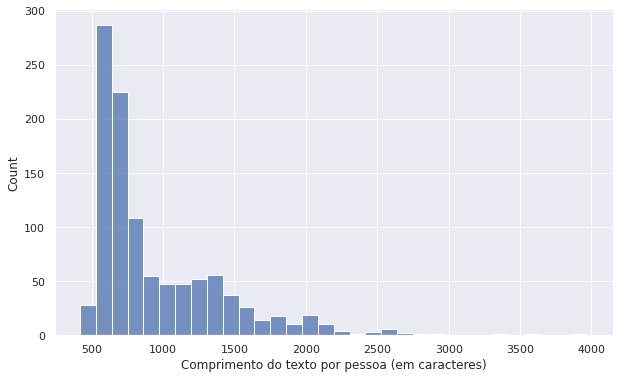

In [28]:
p = sns.histplot(text_grouped_by_user.apply(lambda x: len(x)))
p.set(xlabel="Comprimento do texto por pessoa (em caracteres)")

# Emails Enron 

In [77]:
enron = pd.read_csv("../../../datasets/emails.csv",
                    sep=",",
                    usecols=range(2),
                    quoting=csv.QUOTE_ALL)

In [78]:
filter_author = lambda row: row["file"].split("/")[0]
enron["author"] = enron.apply(filter_author, axis=1)

In [79]:
filter_category = lambda row: row["file"].split("/")[1].strip("_")
enron["category"] = enron.apply(filter_category, axis=1)

In [80]:
filter_file_index = lambda row: row["file"].split("/")[2] if len(row["file"].split("/")) > 2 else ""

enron["file_index"] = enron.apply(filter_file_index, axis=1)

In [81]:
enron

,file,message,author,category,file_index
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,allen-p,sent_mail,1.
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,allen-p,sent_mail,10.
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,allen-p,sent_mail,100.
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,allen-p,sent_mail,1000.
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,allen-p,sent_mail,1001.
...,...,...,...,...,...
517396,zufferli-j/sent_items/95.,Message-ID: <26807948.1075842029936.JavaMail.e...,zufferli-j,sent_items,95.
517397,zufferli-j/sent_items/96.,Message-ID: <25835861.1075842029959.JavaMail.e...,zufferli-j,sent_items,96.
517398,zufferli-j/sent_items/97.,Message-ID: <28979867.1075842029988.JavaMail.e...,zufferli-j,sent_items,97.
517399,zufferli-j/sent_items/98.,Message-ID: <22052556.1075842030013.JavaMail.e...,zufferli-j,sent_items,98.


In [33]:
enron.columns.to_list()

['file', 'message', 'author', 'category', 'file_index']

In [82]:
enron = enron[['author', 'category', 'file_index', 'file', 'message']]

In [83]:
enron

,author,category,file_index,file,message
0,allen-p,sent_mail,1.,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p,sent_mail,10.,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p,sent_mail,100.,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p,sent_mail,1000.,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p,sent_mail,1001.,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
...,...,...,...,...,...
517396,zufferli-j,sent_items,95.,zufferli-j/sent_items/95.,Message-ID: <26807948.1075842029936.JavaMail.e...
517397,zufferli-j,sent_items,96.,zufferli-j/sent_items/96.,Message-ID: <25835861.1075842029959.JavaMail.e...
517398,zufferli-j,sent_items,97.,zufferli-j/sent_items/97.,Message-ID: <28979867.1075842029988.JavaMail.e...
517399,zufferli-j,sent_items,98.,zufferli-j/sent_items/98.,Message-ID: <22052556.1075842030013.JavaMail.e...


In [84]:
enron = enron.loc[enron.category == "sent_mail"]

In [85]:
def is_header(msg_row):
    return len(msg_row.split(':')) >= 2 or msg_row[0:1] == '\t'
    
def remove_header(msg):
    line_idx = 0
    
    while is_header(msg[line_idx]):
        line_idx += 1
        
        if line_idx >= len(msg):
            return []
    
    return msg[line_idx:]



def is_content(msg_row):
    return re.search(r"[-]+ Forwarded|[-]+Original", msg_row) is None \
           and re.search(r"From: ", msg_row) is None 

def remove_forward_and_replyes(content):
    line_idx = 0
    
    while is_content(content[line_idx]):
        line_idx += 1
    
        if line_idx >= len(content):
            return content[:line_idx]
    
    return content[:line_idx]
    
    
def filter_authoral_message(row):
    email = row.split('\n')
    content = remove_header(email)
    authoral_msg = remove_forward_and_replyes(content)
    
    return "\n".join(authoral_msg)


In [86]:
enron["message"] = enron.apply(lambda row: filter_authoral_message(row["message"]), axis=1)

<ipython-input-86-d5ac40e569f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron["message"] = enron.apply(lambda row: filter_authoral_message(row["message"]), axis=1)


In [87]:
enron.sample(20)

,author,category,file_index,file,message
302176,mann-k,sent_mail,3525.,mann-k/_sent_mail/3525.,\nfyi \n\nKay
291830,love-p,sent_mail,504.,love-p/_sent_mail/504.,"\nthanks for all of your help, it looks like w..."
302365,mann-k,sent_mail,3696.,mann-k/_sent_mail/3696.,\nSounds good. Early in the week is better fo...
166148,hernandez-j,sent_mail,16.,hernandez-j/_sent_mail/16.,\nM Deal #333292 A&B was sent to the file room...
500543,whalley-l,sent_mail,89.,whalley-l/_sent_mail/89.,\njust thought i'd send this your way.\n\n
136377,giron-d,sent_mail,363.,giron-d/_sent_mail/363.,\nQuestions:\n\nWhat does being short/long a p...
10626,bass-e,sent_mail,30.,bass-e/_sent_mail/30.,\n
332658,mclaughlin-e,sent_mail,89.,mclaughlin-e/_sent_mail/89.,\nFor 2/23/2001:\n\nMarch $5.131\nApril $5.173...
403421,scott-s,sent_mail,37.,scott-s/_sent_mail/37.,\nFor your information. The outcome was great...
202017,kaminski-v,sent_mail,690.,kaminski-v/_sent_mail/690.,


## Quantos autores distintos?

In [88]:
print(f"Total de {len(enron.author.unique())} autores")

Total de 78 autores


## Quantos emails enviados por autor?

In [89]:
enron.author.value_counts().describe()

count      78.000000
mean      386.012821
std       680.443887
min         3.000000
25%        37.250000
50%       155.000000
75%       358.000000
max      4220.000000
Name: author, dtype: float64

[Text(0.5, 0, 'Quantidade de emails enviados')]

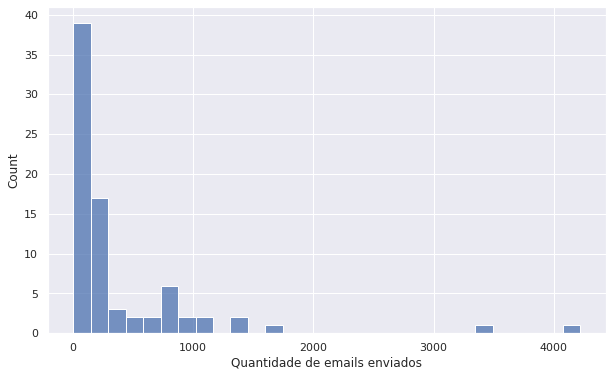

In [42]:
p = sns.histplot(enron.author.value_counts())
p.set(xlabel="Quantidade de emails enviados")

## Comprimento de cada email

In [43]:
leng_tot = enron.message.apply(lambda x: len(x))
leng_tot.describe()

count     30109.000000
mean        390.142449
std        1917.098310
min           0.000000
25%          41.000000
50%         142.000000
75%         419.000000
max      248666.000000
Name: message, dtype: float64

<Figure size 216x360 with 0 Axes>

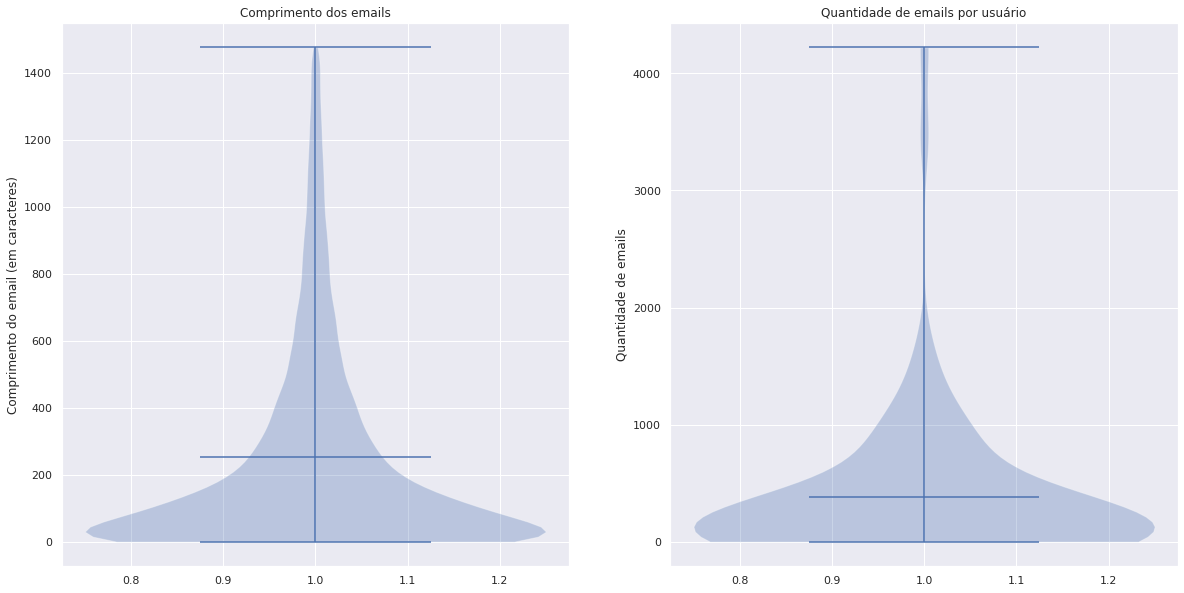

In [95]:
pyplot.figure(figsize=(3,5))
fig, ax = plt.subplots(1,2, figsize=(20,10))

quantile = 0.05
lengs = enron.message.apply(lambda x: len(x))

lengs = lengs[lengs.between(0, lengs.quantile(1-quantile))]
lengs

ax[0].violinplot(lengs, vert=True, showmeans=True)
ax[1].violinplot(enron.author.value_counts(), vert=True, showmeans=True)
ax[0].set_ylabel("Comprimento do email (em caracteres)")
ax[0].set_title("Comprimento dos emails")

ax[1].set_ylabel("Quantidade de emails")
ax[1].set_title("Quantidade de emails por usuário")
fig.savefig("../analises/figures/enron/AD_violin.pdf")

In [98]:
lengs.describe()

count    28604.000000
mean       252.957279
std        308.839031
min          0.000000
25%         37.000000
50%        128.000000
75%        357.000000
max       1476.000000
Name: message, dtype: float64

In [99]:
enron.author.value_counts().describe()

count      78.000000
mean      386.012821
std       680.443887
min         3.000000
25%        37.250000
50%       155.000000
75%       358.000000
max      4220.000000
Name: author, dtype: float64

In [45]:
max_id = max(enron.message.apply(func=lambda x: len(x)).to_dict().items(), key=operator.itemgetter(1))[0]
max_email = enron.loc[max_id].message
print(f"O maior email tem {len(max_email)} caracteres, e é composto por \n\n {max_email}")

O maior email tem 248666 caracteres, e é composto por 

 
ABDateTime                  DataType Price                    Retrieved                   
--------------------------- -------- ------------------------ --------------------------- 
2001-01-01 01:00:00         A        141.39999                2001-01-02 01:01:00
2001-01-01 02:00:00         A        141.41                   2001-01-02 01:01:00
2001-01-01 03:00:00         A        141.39999                2001-01-02 01:01:00
2001-01-01 04:00:00         A        141.37                   2001-01-02 01:01:00
2001-01-01 05:00:00         A        141.36                   2001-01-02 01:01:00
2001-01-01 06:00:00         A        141.36                   2001-01-02 01:01:00
2001-01-01 07:00:00         A        141.37                   2001-01-02 01:01:00
2001-01-01 08:00:00         A        141.37                   2001-01-02 01:01:00
2001-01-01 09:00:00         A        141.37                   2001-01-02 01:01:00
2001-01-01 10:00:00   

In [54]:
quantile = 0.1
lengs = enron.message.apply(lambda x: len(x))

lengs = lengs[lengs.between(0, lengs.quantile(1-quantile))]
lengs

0          24
1         787
2          31
3         188
4          36
         ... 
500547    852
500548    327
500549     91
500551     58
500552     42
Name: message, Length: 27098, dtype: int64

In [97]:
len(enron.author.unique())

78

<AxesSubplot:xlabel='message', ylabel='Count'>

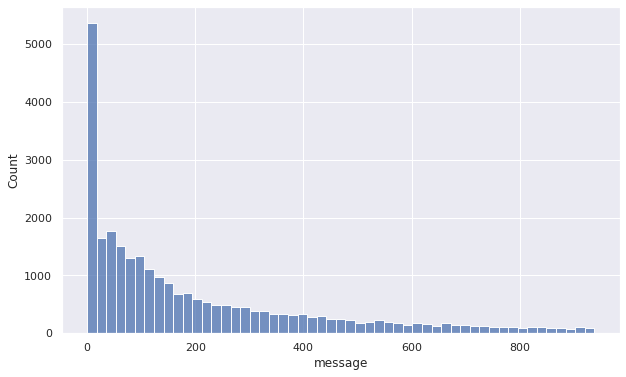

In [55]:
sns.histplot(lengs)

In [56]:
max_id = max(lengs.to_dict().items(), key=operator.itemgetter(1))[0]
max_email = enron.loc[max_id].message
print(f"O maior email (quartil {quantile} {1-quantile}) tem {len(max_email)} caracteres, e é composto por \n\n {max_email}")

O maior email (quartil 0.1 0.9) tem 938 caracteres, e é composto por 

 
Jacques,

I think we reached an agreement with George and Larry to pick up the items of 
value and not pay any fees for their time.  It looks as if we will be able to 
use everything they have done (engineering, architecture, survey, 
appraisal).  One point that is unclear is they claim that the $15,000 in 
extensions that they paid was applied to the purchase price of the land like 
earnest money would be applied.  I looked at the closing statements and I 
didn't see $15,000 applied against the purchase price.  Can you help clear 
this up.

Assuming we clear up the $15,000, we need to get the property released.  
Keith and I are concerned about taking over the Bishop Corner partnership and 
the risk that there could be undisclosed liabilities.  On the other hand, 
conveyance of the partnership would be a time and money saver if it was 
clean.  What is your inclination?

Call as soon as you have a chance to review

In [57]:
enron.to_csv(path_or_buf="../../../datasets/emails-filtered.csv", index=False, quoting=csv.QUOTE_ALL)